✔ Dataset Loaded Successfully!
       Time           Source Destination Protocol  Length  Source Port  \
0  0.000000  VMware_8a:60:5f   Broadcast      ARP    60.0          NaN   
1  0.081233  VMware_8a:12:84   Broadcast      ARP    60.0          NaN   
2  0.217863  VMware_8a:7e:e9   Broadcast      ARP    60.0          NaN   
3  0.419426  VMware_8a:b2:34   Broadcast      ARP    60.0          NaN   
4  0.559886  VMware_8a:4e:1c   Broadcast      ARP    60.0          NaN   

   Destination Port  bad_packet  
0               NaN         0.0  
1               NaN         0.0  
2               NaN         0.0  
3               NaN         0.0  
4               NaN         0.0  


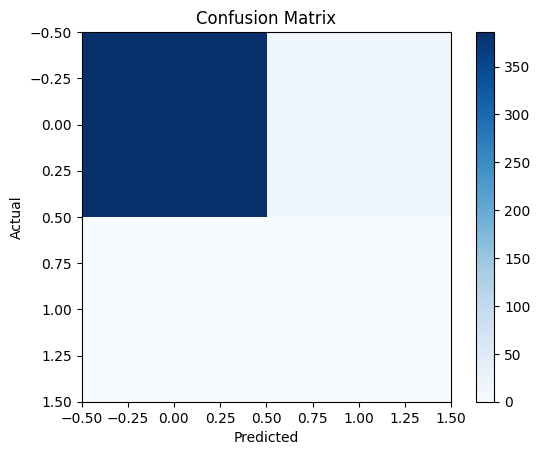

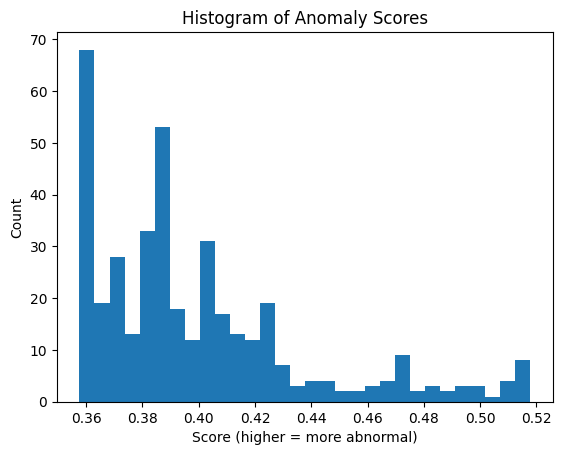

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


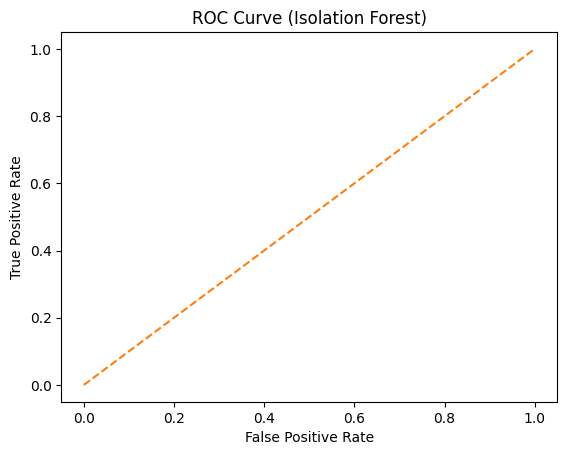

ROC AUC Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score
)


df = pd.read_csv("/content/NandakumarMenonAdvait_MT_S2.csv.csv")

print("✔ Dataset Loaded Successfully!")
print(df.head())

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

target_col = "bad_packet"

X = df.drop(columns=[target_col])
y = df[target_col]  

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42
)

model = IsolationForest(
    contamination=0.03,   
    random_state=42
)

model.fit(X_train)

y_pred_iso = model.predict(X_test)

y_pred = [1 if p == -1 else 0 for p in y_pred_iso]

scores = model.decision_function(X_test)
probabilities = (-scores + 1) / 2  # normalize to 0–1

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

plt.hist(probabilities, bins=30)
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Score (higher = more abnormal)")
plt.ylabel("Count")
plt.show()

fpr, tpr, thresh = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.title("ROC Curve (Isolation Forest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, probabilities))
